# Project 1 A/B Test
## Francis Yang 10/28/22
**From prompt:**
An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst

**Goal:** Identify statiscally significant difference in responses

**Methods:**
- z-test 
- Fisher exact test
- correlation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("datasets\AdSmartABdata - AdSmartABdata.csv")

In [2]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


## Columns Description

-    **auction_id**: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

-    **experiment**: which group the user belongs to - control or exposed.
        - **control**: users who have been shown a dummy ad
        - **exposed**: users who have been shown a creative, an online interactive ad, with the SmartAd brand. 

-    **date**: the date in YYYY-MM-DD format

-    **hour**: the hour of the day in HH format.

-    **device_make**: the name of the type of device the user has e.g. Samsung

-    **platform_os**: the id of the OS the user has.

-    **browser**: the name of the browser the user uses to see the BIO questionnaire.

-    **yes**: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

-    **no**: 1 if the user chooses the “No” radio button for the BIO questionnaire.


## Visualizations
### Split dataset into control and exposed groups

In [4]:
A = data[data["experiment"] == "control"]
B = data[data["experiment"] == "exposed"]
print(f"Size of group A is {A.shape}")
print(f"Size of group B is {B.shape}")

Size of group A is (4071, 9)
Size of group B is (4006, 9)


Sample imbalance present, but not that big

### Analysis of Individual Groups

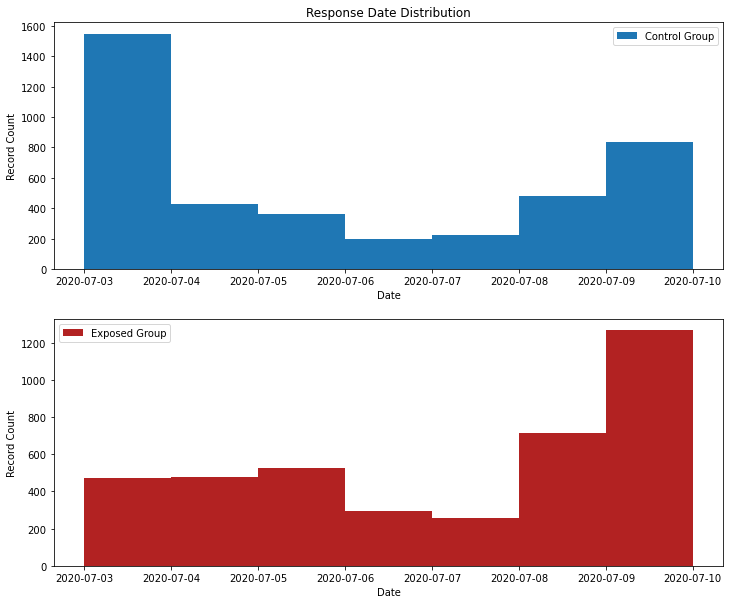

In [5]:
Bcolor="firebrick" #for plotting
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.hist(A.sort_values("date").date,bins=7)
plt.xlabel("Date")
plt.ylabel("Record Count")
plt.title("Response Date Distribution")
plt.legend(labels=["Control Group"])
plt.subplot(2,1,2)
plt.hist(B.sort_values("date").date,bins=7,color=Bcolor)
plt.xlabel("Date")
plt.ylabel("Record Count")
plt.legend(labels=["Exposed Group"]);

Date of responses are somewhat imbalanced. May suggest difference in day to day response within group.

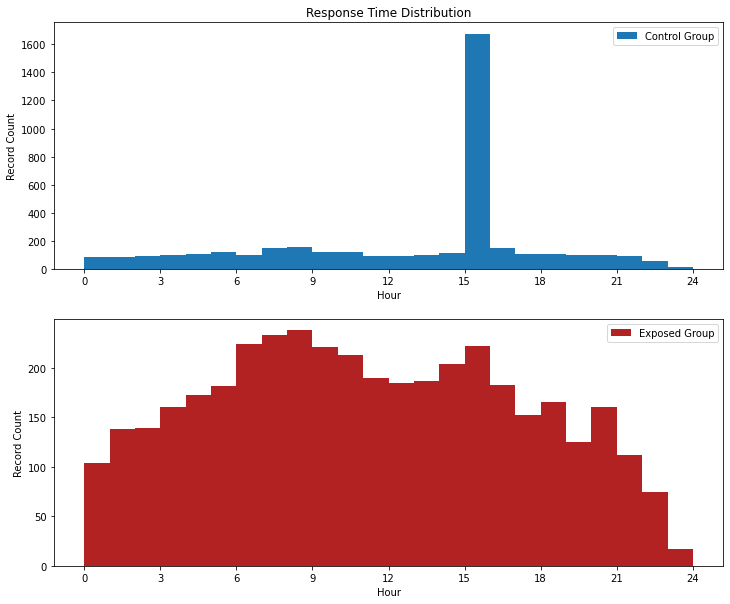

In [6]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.hist(A.sort_values("hour").hour, bins=range(0,25,1))
plt.xticks(range(0,25,3))
plt.xlabel("Hour")
plt.ylabel("Record Count")
plt.title("Response Time Distribution")
plt.legend(labels=["Control Group"]);
plt.subplot(2, 1, 2)
plt.hist(B.sort_values("hour").hour, color=Bcolor, bins=range(0,25,1))
plt.xlabel("Hour")
plt.ylabel("Record Count")
plt.xticks(range(0,25,3))
plt.legend(labels=["Exposed Group"]);

Responses from Exposed group is more normally distributed than Control group. May suggest habitual bias in Control group responses, in terms of social media activity.

In [7]:
dev_A = A.device_make.value_counts().to_frame()
dev_A.rename(columns={"device_make": "count_A"}, inplace=True)
dev_A.reset_index(level=0, inplace=True)

dev_B = B.device_make.value_counts().to_frame()
dev_B.rename(columns={"device_make": "count_B"}, inplace=True)
dev_B.reset_index(level=0, inplace=True)

In [8]:
device = dev_A.merge(dev_B, how="outer", on='index')
print("A:",dev_A.shape,"B:",dev_B.shape,"Total:",device.shape)
device.isna().value_counts()

A: (168, 2) B: (217, 2) Total: (269, 3)


index  count_A  count_B
False  False    False      116
       True     False      101
       False    True        52
dtype: int64

Output of `value_counts()` confirms outer join completed successfully.

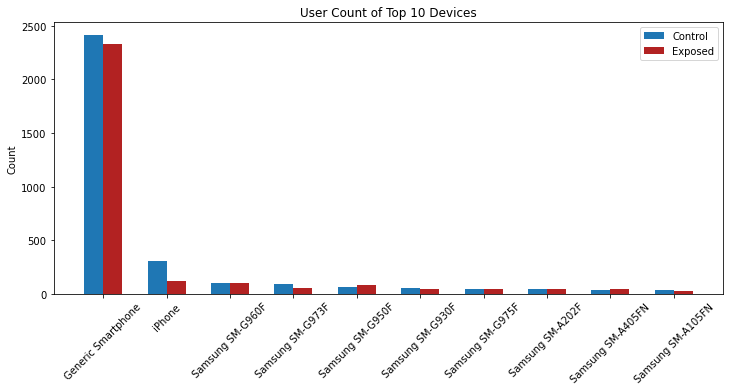

In [9]:
plt.figure(figsize=(12, 5))
width = 0.3
labels = device["index"][:10].to_list()
plt.xticks(range(10), labels,rotation=45)
plt.bar(device.index[:10]-width/2, device.count_A[:10], width=width)
plt.bar(device.index[:10]+width/2, device.count_B[:10], width=width, color=Bcolor)
plt.ylabel("Count")
plt.title("User Count of Top 10 Devices")
plt.legend(["Control","Exposed"]);

Personally, I don't think the device affects decision making, but here is a visualization of the top 10 devices people used to take the survey.

In [10]:
OS = data.groupby(['experiment', "platform_os"]).size()
display(OS)

experiment  platform_os
control     5               308
            6              3763
exposed     5               120
            6              3885
            7                 1
dtype: int64

Sample size imbalance for OS version 5 and 7, not that much for 6.

In [11]:
bro_A = A.browser.value_counts().to_frame()
bro_A.rename(columns={"browser": "count_A"}, inplace=True)
bro_A.reset_index(level=0, inplace=True)

bro_B = B.browser.value_counts().to_frame()
bro_B.rename(columns={"browser": "count_B"}, inplace=True)
bro_B.reset_index(level=0, inplace=True)

browser = bro_A.merge(bro_B, how="outer", on='index')
print("A:", bro_A.shape, "B:", bro_B.shape, "Total:", browser.shape)
browser.isna().value_counts()
# There is possibly an easier way to make the data for the graph using groupby but I couldn't even
# browser = data.groupby(["experiment", "browser"]).size().to_frame()
# browser.rename(columns={0:"counts"}, inplace=True)
# browser

A: (12, 2) B: (12, 2) Total: (15, 3)


index  count_A  count_B
False  False    False      9
                True       3
       True     False      3
dtype: int64

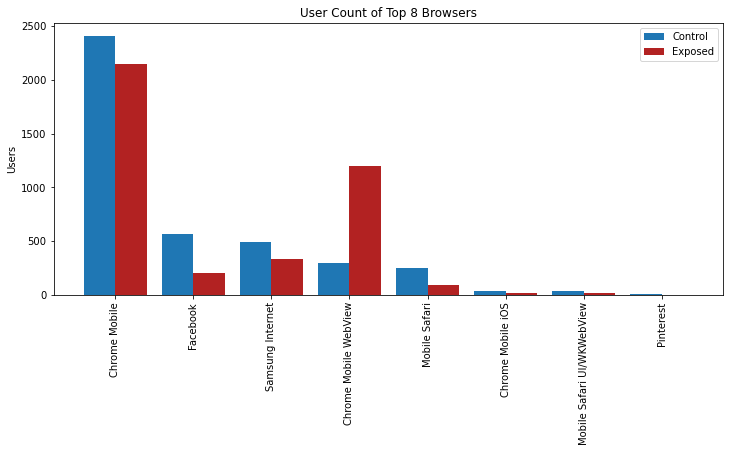

In [12]:
plt.figure(figsize=(12, 5))
width = 0.4
top = 8
labels = browser["index"][:top].to_list()
plt.xticks(range(top), labels,rotation="vertical")
plt.bar(browser.index[:top]-width/2, browser.count_A[:top], width=width)
plt.bar(browser.index[:top]+width/2, browser.count_B[:top], width=width, color=Bcolor)
plt.ylabel("Users")
plt.title(f"User Count of Top {top} Browsers")
plt.legend(["Control","Exposed"], loc="upper right");

I don't expect the type of browser to affect how people respond to the survey.

In [13]:
active_A = A.loc[(A['yes'] == 1) | (A['no'] == 1)]
active_B = B.loc[(B['yes'] == 1) | (B['no'] == 1)]
rpr_A = active_A.shape[0]/A.shape[0]*100
rpr_B = active_B.shape[0]/B.shape[0]*100
print("------  All  ------- A:", A.shape, "B:", B.shape)
print("----Y/N Response---- A:", active_A.shape, " B:", active_B.shape)
print("----Response Rate--- A: {0:.2f}%    B: {1:.2f}% ".format(rpr_A, rpr_B))

------  All  ------- A: (4071, 9) B: (4006, 9)
----Y/N Response---- A: (586, 9)  B: (657, 9)
----Response Rate--- A: 14.39%    B: 16.40% 


There is a surprisingly large amount of people who didn't answer the survey in both Control and Exposed groups. This affects sample size for comparisons, such that pairwise comparison is less of an option.

## Statistical Tests
$$
  \begin{cases}
    H_0:& p_{con}=p_{exp}\\
    H_1: &p_{con}\neq p_{exp}
\end{cases}
$$

For each exposure: Null hypothesis would be amount of yes votes equal to no votes. Alternative is number of votes are different <br>
Between exposures: Null hypothesis would be proportion of yes or no votes is the same in both groups. Alternative is the proportions are different
### Z-Test
To compare exposure we would compare the ratio of yes votes between control and exposed groups which is called a 2-sample Z-Test for comparing proportions. This could also be done for no votes. Sample size is relatively large, otherwise a T-test would be used.


Test Statistics stat:  -0.645680181221037
Z-critical:  1.959963984540054
P_value:  1.4815135017801033
Confidence Interval of 2 sample Z-test for proportions:  [-0.07  0.04]


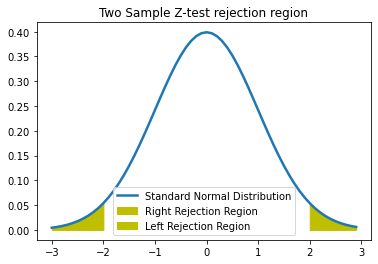

In [14]:
from scipy.stats import norm

y_active_A = active_A.loc[(A['yes'] == 1)].shape[0]
n_active_A = active_A.loc[(A['no'] == 1)].shape[0]
total_active_A = active_A.shape[0]
y_active_B = active_B.loc[(B['yes'] == 1)].shape[0]
n_active_B= active_B.loc[(B['no'] == 1)].shape[0]
total_active_B = active_B.shape[0]

pcon = y_active_A/total_active_A
pexp = y_active_B/total_active_B

ppool = (y_active_A+y_active_B)/(total_active_A+total_active_B)
spool = ppool*(1-ppool)*((1/total_active_A)+(1/total_active_B))

Z = (pcon-pexp)/np.sqrt(spool)

# Significance Level
alpha = 0.05

# Standard Error
SE = np.sqrt(spool)

# test statsitics
Test_stat = (pcon - pexp)/SE
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)

# Margin of error
m = SE * Z_crit
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_stat)*2

# Confidence Interval
CI = [(pcon-pexp) - SE * Z_crit, (pcon-pexp) + SE * Z_crit]

if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
    print(p_value)

print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

After conducting a Z-test for comparing proportions, we fail to reject the null hyposthesis. This means the amount of yes votes in the control group is equal/proportionate to the amount of yes votes in the exposed group and that they come from the same distribution.

### Fisher Exact

In [17]:
from scipy.stats import fisher_exact

# 2x2 Matrix
fd = pd.DataFrame({"A":[y_active_A,n_active_A],"B":[y_active_B,n_active_B]}, index=['yes','no'])

odds_ratio, p_value = fisher_exact(fd)

if p_value < 0.05:
    print(f'p_value: {p_value}\nResult: There is a significant difference')
else:
    print(f'p_value: {p_value}\nResult: No significant difference')


p_value: 0.5309716576383721
Result: No significant difference


Similar to the outcome of the 2-sample Z-Test, Fisher's Exact Test results say there is no significant difference in yes responses between the control and exposed groups. 

In [19]:
fd

,A,B
yes,264,308
no,322,349


## Conclusion

Based on the statistical tests, there is no significant difference in response between the 2 advertisements. In both groups, there was a majority "no" response, however, it is unclear what the question in the survey was. My guess is that the sample population disliked something in the advertisements. One area of improvement for the study could be increasig the follow through rate of people who opened the survey, but didn't answer. This could be done by offering incentive to complete the survey.